In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
def av_fix_per_minute(df):
#   создаем переменную для записи значения секунды, в которую происходит событие
    df["Seconds"] = np.zeros(len(df))
    
#   записываем в последний (только что созданные столбец "Seconds") значение текущей секунды
    for i in range(len(df)):
        df.iloc[i,-1] = df.iloc[i,4]//(10**6)// 60
        
#   считаем среднее значений события "Fixation B" за кажду секунду и 
    average_fixation = pd.DataFrame(df.where(df["Event"] == "Fixation B").groupby(by=[df.columns[-1]]).mean())
    
#   Сохраняем в Excel таблицу с данными
    with  pd.ExcelWriter(f'{file}.xlsx') as writer:
        average_fixation.to_excel(writer)
    
#   строим график по полученным средним из таблицы average_fixation
    fig, ax = plt.subplots(figsize=(20, 5))
    figure =  sns.lineplot(data = average_fixation, 
                           x = average_fixation.index, 
                           y = average_fixation['Duration']//(10**3))
    ax.set(xlabel='Минуты', ylabel='Длительность фиксаций, (мс)')
    
#   сохраняем полученный график под именем файла, по данным которого он построен 

    return figure.get_figure().savefig(f"{file}.png")
    
                                                          
            

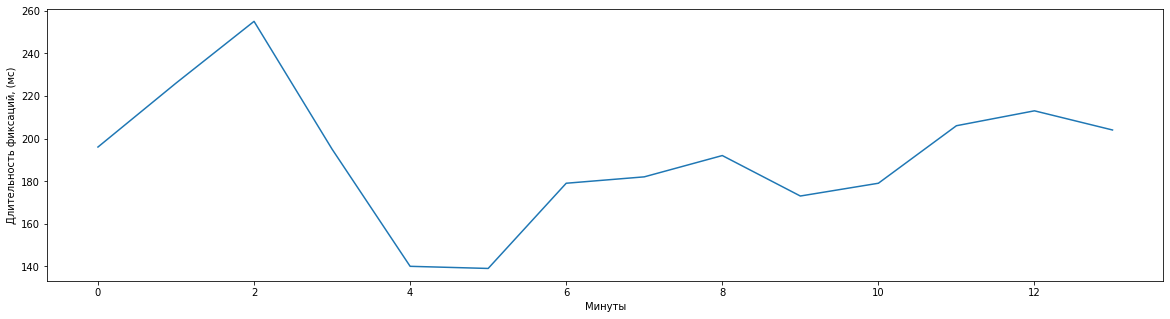

In [3]:
# получаем список всех txt файлов в директории (по умолчанию той, в которой лежит скрипт)
files = glob.glob("*.txt")


for file in files:
#   проверяем файла на валидность, если первое значение в первой колоне не метка события ("Saccade B"|"Fixation B"),
#   то выводим ошибку
    check = pd.read_table(file, header = 0)
    
    if check.iloc[0,0] != "Saccade B" and check.iloc[0,0] != "Fixation B":
        print("Неверный формат данных!")
        
#   формируем таблицу из данных файла и 
#   для удобства приписываем имена колонкам (соответствие проверено по файлам Stage 1)    
    else:
        df =  pd.DataFrame(pd.read_table(file, header = 0,
                   names = ['Event', 'Unnamed','Count', 
                            'Start', 'End', 'Duration',
                            'Y_left', 'X_left', 'Y_right', 'X_right', 
                            'Unnamed1','Unnamed2','Unnamed3']))
        
#       запускаем функцию подсчета длины фиксаций и сохранения графиков
        av_fix_per_minute(df)
    

       